# <center><u>Exploratory Data Analysis(EDA) on Vehicle Insurance<u><center>

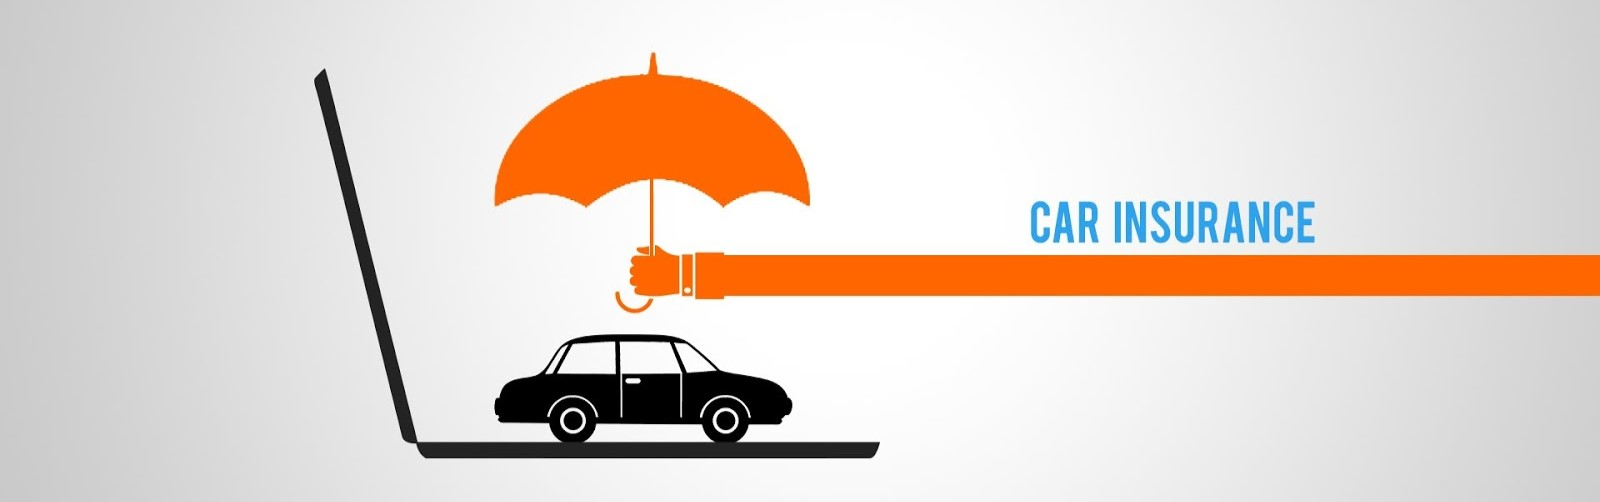




### 1.<u>Importing Libraries</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.<u>Loading Dataset</u>

In [3]:
df=pd.read_csv("D:/SKCL/Python/Vehicle_Insurance.csv")

### 3.<u>Understanding the structure of the dataset<u>

In [5]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


### 4.<u>Identifying the types of information available<u>

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.shape

(381109, 12)

In [7]:
df.size

4573308

### 5.<u>Checking for Missing Values<u>

In [14]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### 6.<u>Checking and Treating outliers<u>

#### 6.1 <u>Checking outliers using Box PLots<u>

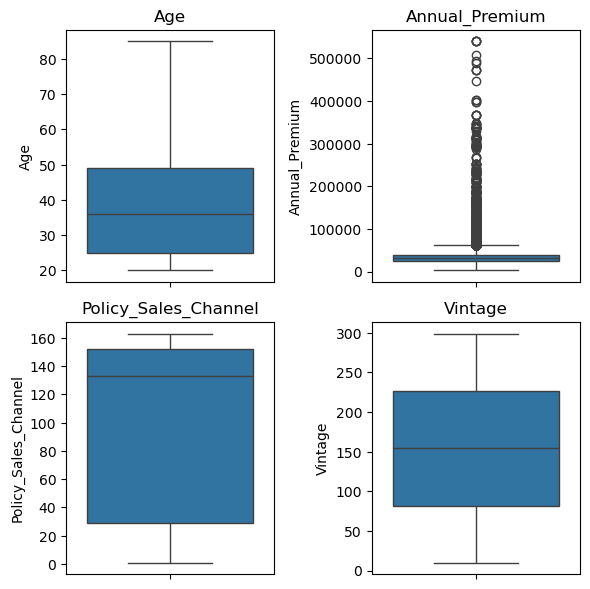

In [16]:
numeric_columns = ['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
plots_per_row = 2

n_rows = (len(numeric_columns) + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6, 3 * n_rows))
axes = axes.flatten() 

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel(column)

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### 6.2 <u>Findings from the Box Plots<u>
- The column **"Annual_Premium"** has potential outliers, which may require further attention, especially if these outliers could impact downstream analysis or model training.
- Other numeric columns, such as **"Age," "Policy_Sales_Channel,"** and **"Vintage,"** do not exhibit notable outliers.

#### 6.3 <u>Treating Outliers in "Annual Premium" Column<u>

In [6]:
def replace_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace values below lower bound with lower bound and values above upper bound with upper bound
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return data

data = replace_outliers(df, 'Annual_Premium')


#### 6.4 <u>Box PLots after Outliers Treatment<u>

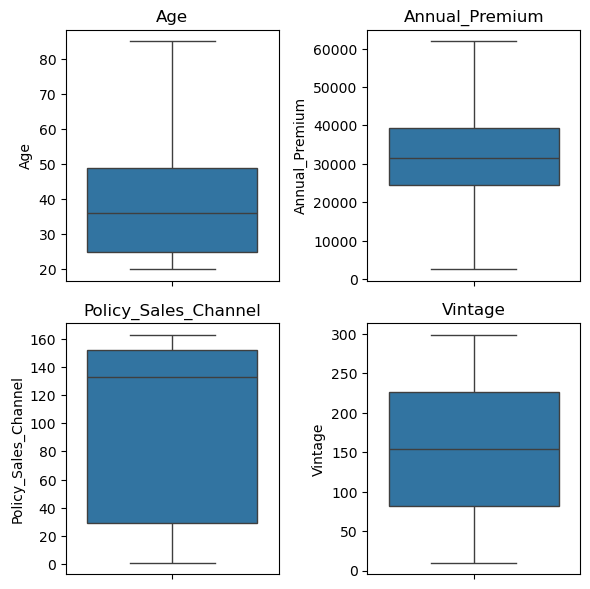

In [50]:
numeric_columns = ['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
plots_per_row = 2

n_rows = (len(numeric_columns) + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6, 3 * n_rows))
axes = axes.flatten() 

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel(column)

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 7.<u>Data Visualization<u>

#### 7.1 <u>Histograms for Continuous Variables<u>

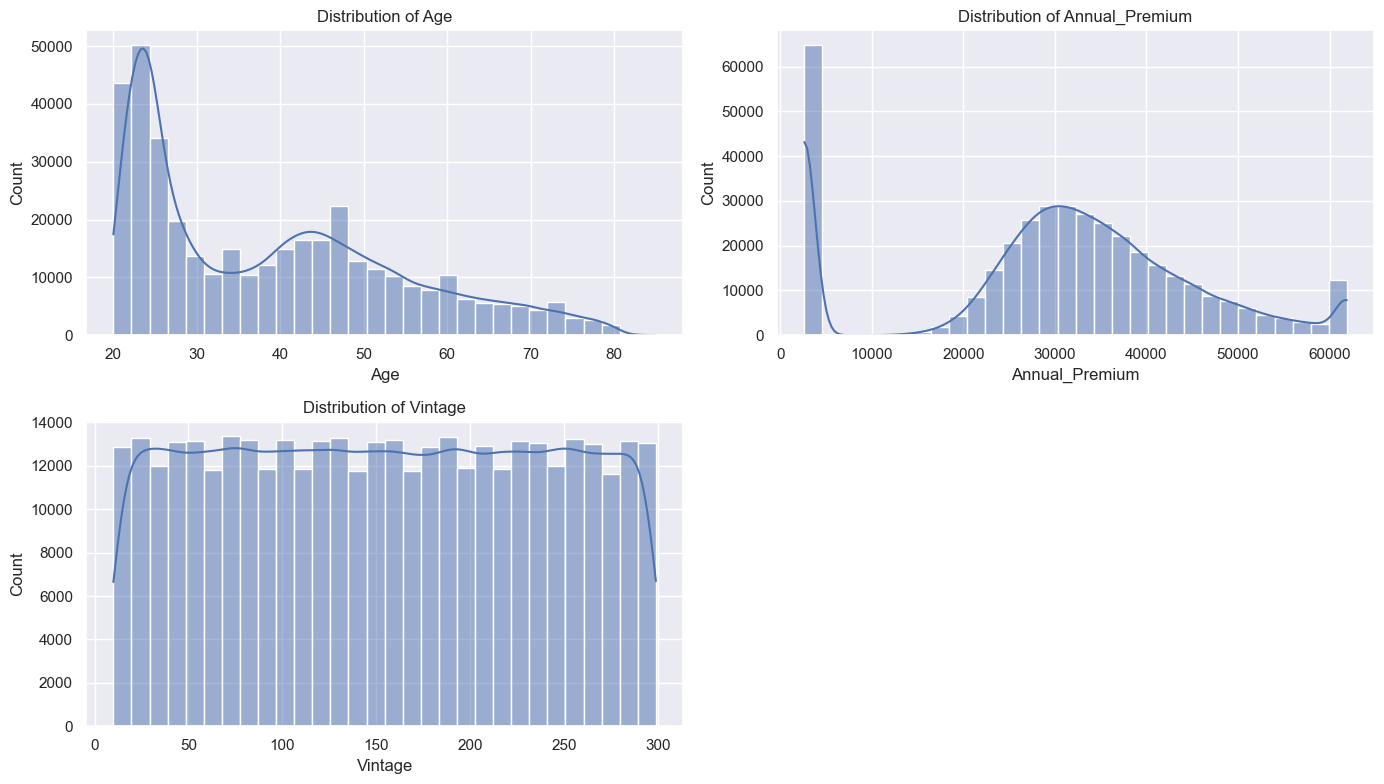

In [69]:
sns.set(style="darkgrid")

continuous_vars = ['Age', 'Annual_Premium', 'Vintage']
plt.figure(figsize=(14, 8))
for i, column in enumerate(continuous_vars, 1):
    plt.subplot((len(continuous_vars) + 1) // 2, 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### Insights from the plots:

**Distribution of Age:**
* Most policyholders are between 20 and 40 years old.
* There's a slight right skew, indicating a higher proportion of older policyholders.

**Distribution of Annual Premium:**
* The annual premium distribution is right-skewed, with a significant number of policies having lower premiums.
* There are a few policies with exceptionally high premiums.

**Distribution of Vintage:**
* The distribution of policy vintage is relatively uniform, with a slight increase in the middle range.
* This indicates a steady growth in the number of policies over time.

**Recommendations:**
* **Targeted Marketing:** Focus marketing efforts on the 20-40 age group to attract new customers and retain existing ones.
* **Product Offerings:** Consider offering a wider range of products with varying premium levels to cater to different customer segments.
* **Customer Retention:** Implement strategies to retain long-term customers, especially those with higher vintage.
* **Data-Driven Decision Making:** Continuously analyze the distribution of age, annual premium, and vintage to identify trends and make informed decisions.

#### 7.2 <u>Count Plots for Categorical Variable<u>

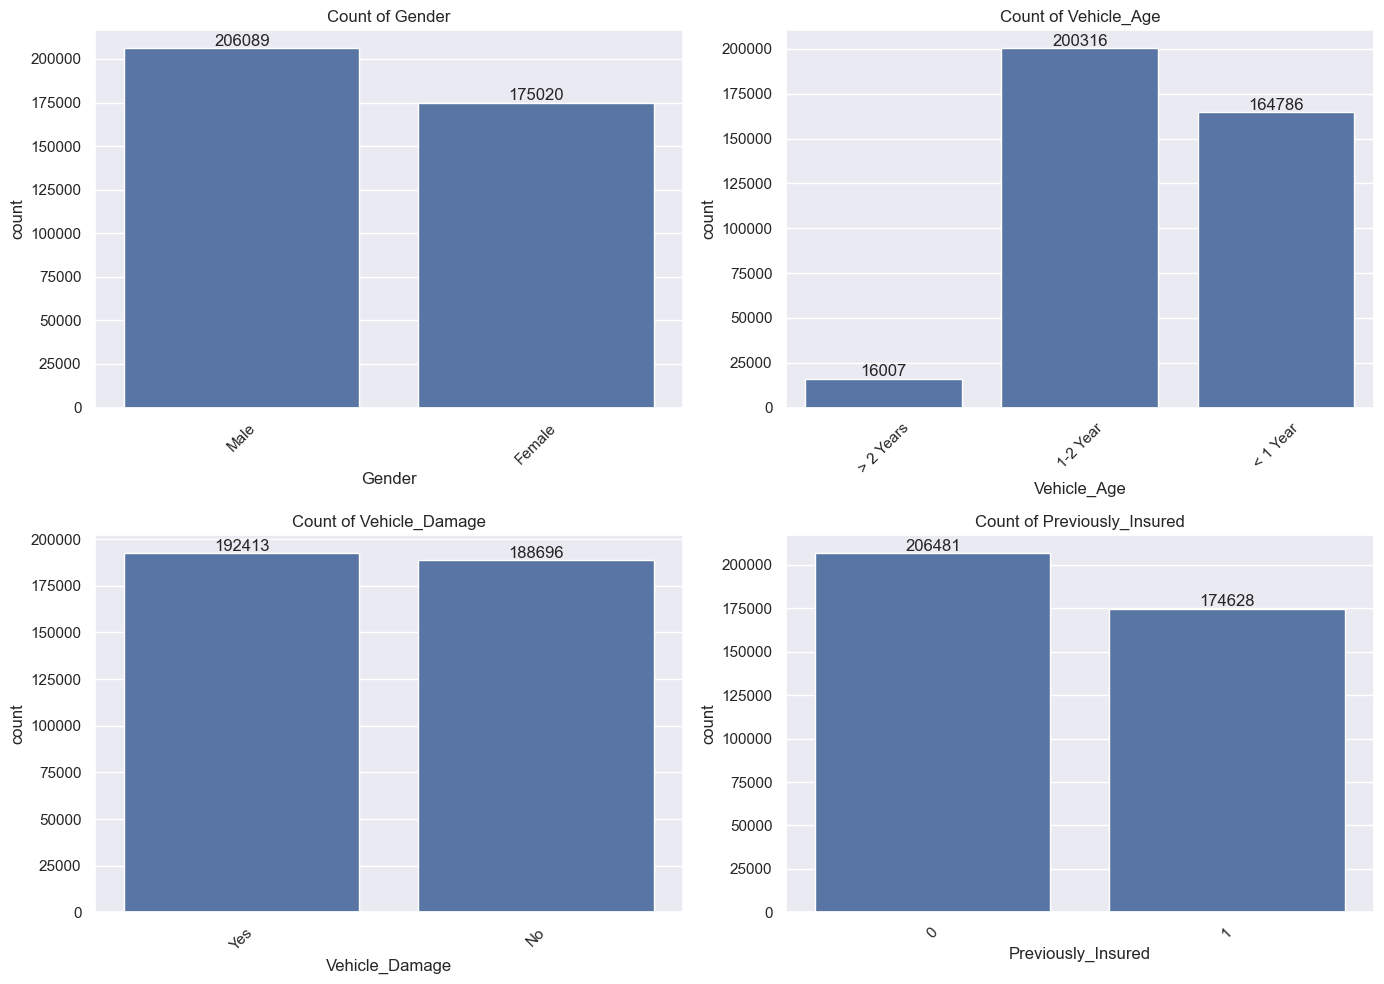

In [88]:
sns.set(style="darkgrid")
categorical_vars = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Previously_Insured']

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_vars, 1):
    plt.subplot((len(categorical_vars) + 1) // 2, 2, i)
    ax = sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

#### Insights from the plots:

**Count of Gender:**

* Majority of the customers are male.

**Count of Vehicle Age:**

* Most of the vehicles are less than 1 year old.

**Count of Vehicle Damage:**

* Majority of the vehicles have not faced any damage.

**Count of Previously Insured:**

* Majority of the customers have not been insured previously.

**Recommendations:**

* **Targeted Marketing:** Focus marketing efforts on female customers to increase their share.
* **Product Offerings:** Consider offering specific products for vehicles older than 1 year.
* **Customer Retention:** Focus on retaining customers with previously insured vehicles.
* **Data-Driven Decision Making:** Continuously analyze the distribution of gender, vehicle age, vehicle damage, and previous insurance status to identify trends and make informed decisions.

### 8. <u>Feature Analysis<u>

#### 8.1 <u>Examining the relationship between features and the target variable<u>

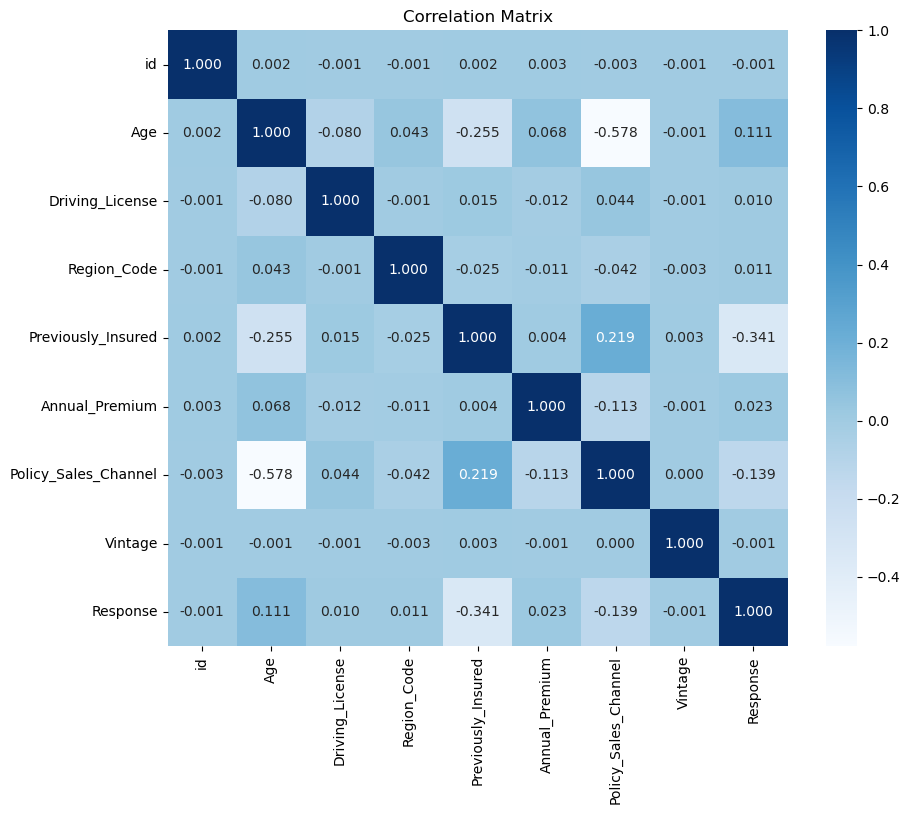

In [8]:
df1 = pd.DataFrame(df)
num_df=df1.select_dtypes(include='number')
correlation_matrix = num_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

#### 8.2 <u>Insights from the Correlation matrix:<u>


- **General Insights**:
  - Most variables show weak correlations with others, indicating minimal linear relationships.
  - The dataset exhibits low multicollinearity.

- **Notable Correlations**:
  - `Previously_Insured` has a moderate negative correlation with `Response` (-0.341), suggesting previously insured customers are less likely to respond positively.
  - `Age` shows a weak positive correlation with `Response` (0.111), indicating older individuals may slightly favor positive responses.
  - `Policy_Sales_Channel` has a slight positive correlation with `Previously_Insured` (0.219).

- **Negligible Correlations**:
  - Features such as `Region_Code`, `Vintage`, and `Annual_Premium` exhibit near-zero correlations with `Response`.
  - `Driving_License` has an almost negligible correlation with any feature.

- **Irrelevant Features**:
  - `id` appears uncorrelated with all variables, making it a candidate for exclusion from analysis.


### 9. <u>Age Distribution Analysis<u>

#####  Analyzing age distribution and its impact on insurance claims.
#####  Comparing the proportion of positive responses (Response = 1) across different age groups.

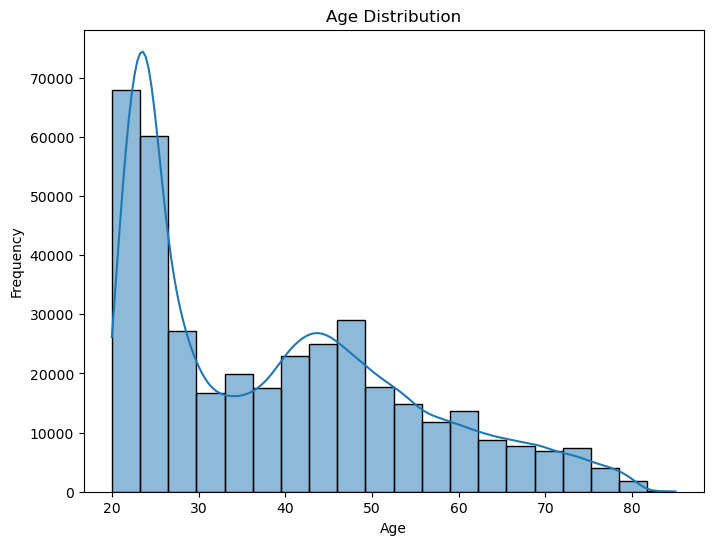

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

| Statistic | Value |
|---|---|
| Count | 381,109 |
| Mean Age | ~38.8 years |
| Median Age | 36 years |
| Age Range | 20 to 85 years |

**Distribution:**
* Fairly even distribution
* Slight concentration around middle age range (30-50 years)

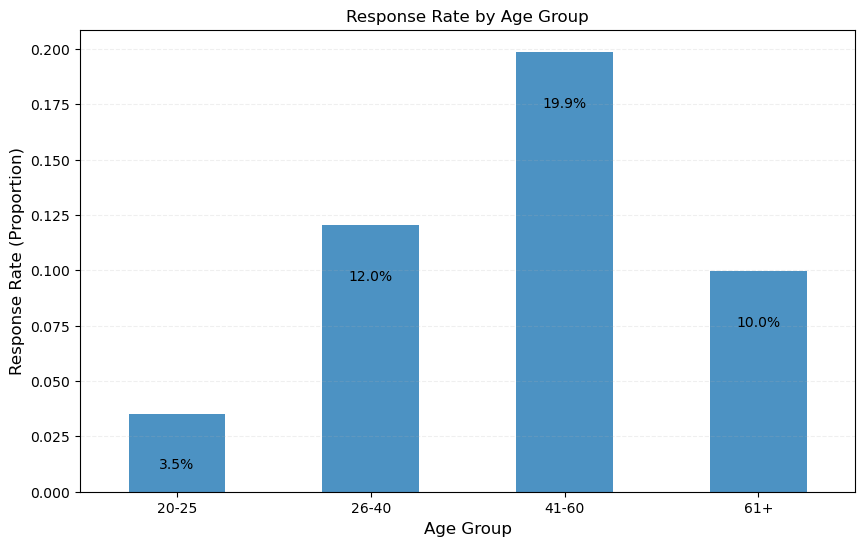

In [33]:
bins = [20, 25, 40, 60, 85]
labels = ['20-25', '26-40', '41-60', '61+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

response_rate_by_age = df.groupby('Age_Group', observed=False)['Response'].mean()

plt.figure(figsize=(10, 6))
ax = response_rate_by_age.plot(kind='bar', alpha=0.8)

for idx, value in enumerate(response_rate_by_age):
    percentage = f"{value * 100:.1f}%"  
    plt.text(
        idx, value - 0.02, 
        percentage,
        ha='center', va='top', fontsize=10, color='black'
    )

plt.title("Response Rate by Age Group", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Response Rate (Proportion)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

**Observations:**
* Policyholders aged 41-60 have the highest response rate (~19.9%), indicating they are more likely to engage with insurance claims.
* Younger policyholders (20-25) have the lowest response rate (~3.5%).
* Senior policyholders (61+) also show a reduced response rate compared to the middle-aged group.
  
##### *This suggests that middle-aged individuals are more actively engaged in insurance claims, possibly due to greater insurance needs or financial awareness.*

### 10. <u>Premium Analysis<u>

##### Analyzing the distribution of insurance premiums and their relationship with claim frequencies

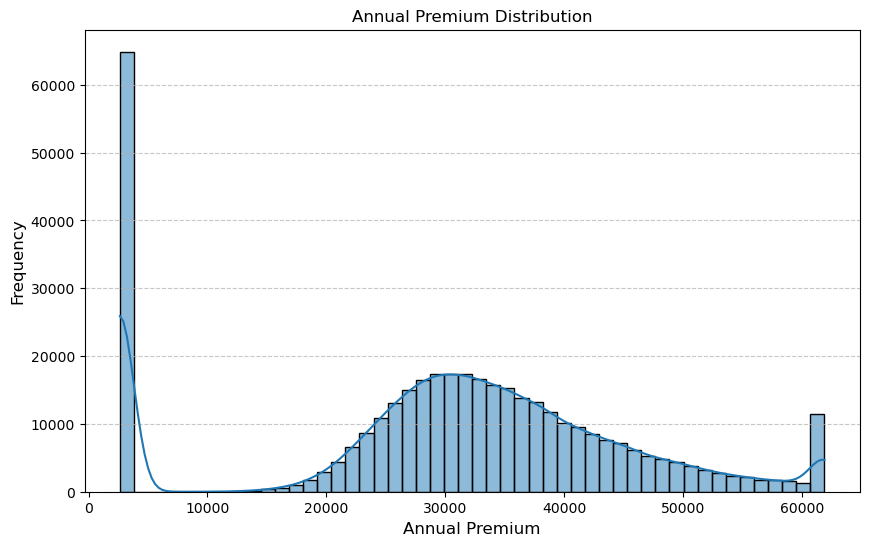

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Premium'], bins=50, kde=True)
plt.title("Annual Premium Distribution", fontsize=12)
plt.xlabel("Annual Premium", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

| Statistic | Value |
|---|---|
| Count | 381,109 |
| Mean | 30,148.17 |
| Standard Deviation | 15,476.40 |
| Minimum | 2,630 |
| 50th Percentile (Median) | 31,669 |
| Maximum | 61,892.50 |

**Distribution:**
* The histogram shows a concentration of premiums between approximately 20,000 and 40,000.

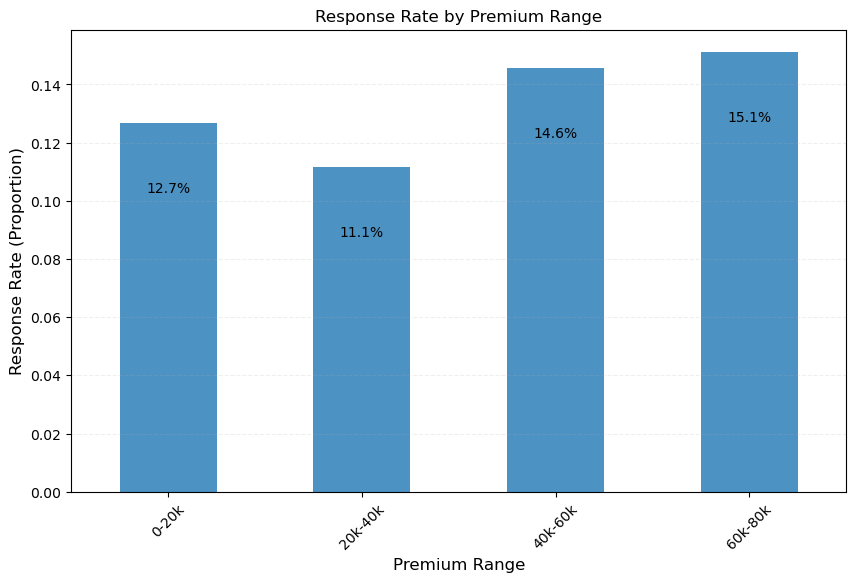

In [31]:
max_premium = max(df['Annual_Premium'].max(skipna=True), 100000)  
premium_bins = [0, 20000, 40000, 60000, max_premium + 1]  
premium_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k']
df['Premium_Range'] = pd.cut(df['Annual_Premium'], bins=premium_bins, labels=premium_labels, right=False)

response_rate_by_premium = df.groupby('Premium_Range', observed=False)['Response'].mean()

plt.figure(figsize=(10, 6))
ax = response_rate_by_premium.plot(kind='bar', alpha=0.8)

for idx, value in enumerate(response_rate_by_premium):
    percentage = f"{value * 100:.1f}%"  
    plt.text(
        idx, 
        value - (0.02 if value > 0.05 else 0.01),  
        percentage, 
        ha='center', 
        va='top', 
        fontsize=10, 
        color='black'
    )

plt.title("Response Rate by Premium Range", fontsize=12)
plt.xlabel("Premium Range", fontsize=12)
plt.ylabel("Response Rate (Proportion)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()


**Observations:**
- **0–20k**: ~12.7% claim frequency (highest among lower ranges).  
- **20k–40k**: ~11.1% claim frequency.  
- **40k–60k**: ~14.6% claim frequency.  
- **60k–80k**: ~15.1% claim frequency (peaks here)

##### *Claim frequency increases with premium range, peaking at 60k-80k. This suggests that more comprehensive policies tend to have higher claim rates.*

### 11. <u>Claim Frequencies<u>

##### The factors contributing to higher claim frequencies using plots to visualize the data.

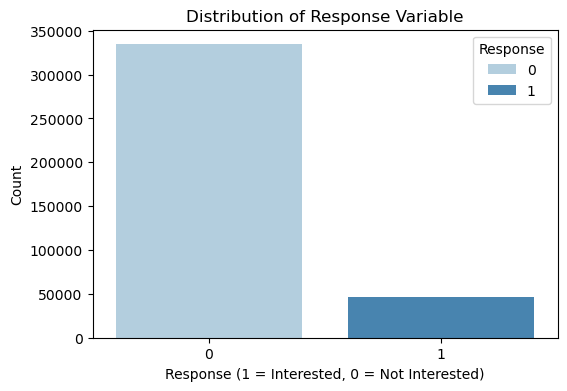

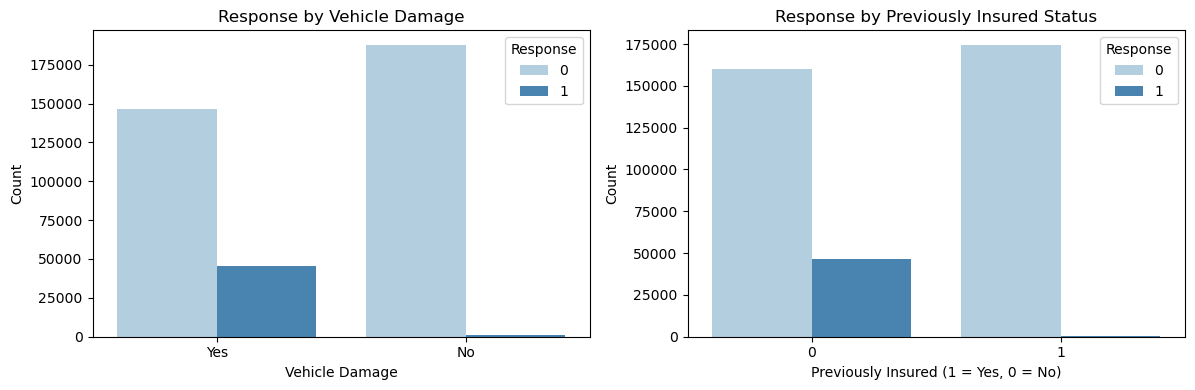

In [68]:
# Plot the distribution of the Response variable
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Response', hue='Response', palette='Blues')
plt.title('Distribution of Response Variable')
plt.xlabel('Response (1 = Interested, 0 = Not Interested)')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Response and other factors
plt.figure(figsize=(18, 4))

# Vehicle_Damage vs Response
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='Vehicle_Damage', hue='Response', palette='Blues')
plt.title('Response by Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')

# Previously_Insured vs Response
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='Previously_Insured', hue='Response', palette='Blues')
plt.title('Response by Previously Insured Status')
plt.xlabel('Previously Insured (1 = Yes, 0 = No)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Observations from the Plots:**

* **Distribution of Response:** The dataset is imbalanced, with significantly more instances where the policyholder is not interested (Response = 0).
* **Vehicle Damage vs Response:** Policyholders with a history of vehicle damage (Vehicle_Damage = Yes) are more likely to respond positively (Response = 1).
* **Previously Insured vs Response:** Policyholders not previously insured (Previously_Insured = 0) are more likely to respond positively.

##### Analyzing the effects of Age, Vehicle_Age, and Annual_Premium on claim frequency.

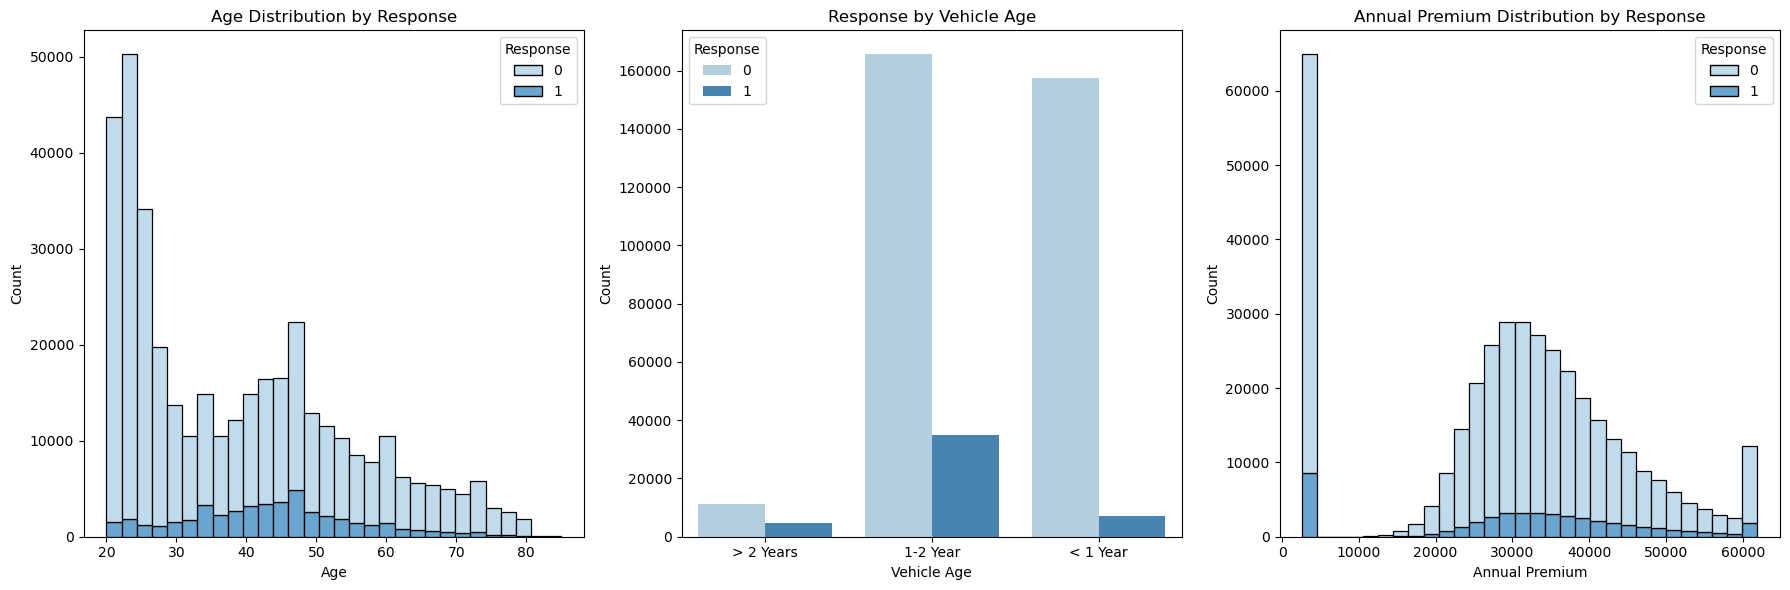

In [43]:
plt.figure(figsize=(18, 6))

# Age distribution by Response
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='Age', hue='Response', multiple='stack', palette='Blues', bins=30, kde=False)
plt.title('Age Distribution by Response')
plt.xlabel('Age')
plt.ylabel('Count')

# Vehicle_Age vs Response
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='Vehicle_Age', hue='Response', palette='Blues')
plt.title('Response by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')

# Annual_Premium distribution by Response
plt.subplot(1, 3, 3)
sns.histplot(data=data, x='Annual_Premium', hue='Response', multiple='stack', palette='Blues', bins=30, kde=False)
plt.title('Annual Premium Distribution by Response')
plt.xlabel('Annual Premium')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Observations from the Plots:**

* **Age Distribution by Response:** Policyholders aged between 20-40 years show a higher interest (Response = 1). Interest in policies declines significantly for policyholders aged above 50.
* **Response by Vehicle Age:** Vehicles older than 2 years (> 2 Years) are associated with a higher number of interested responses. Newer vehicles (< 1 Year) have fewer interested responses.
* **Annual Premium Distribution by Response:** Interested responses (Response = 1) are more concentrated in the lower premium range (approximately below 50,000). Higher premiums show a declining trend in interest.

### 12. <u>Gender Analysis<u>

##### Investigating the role of gender in insurance claims

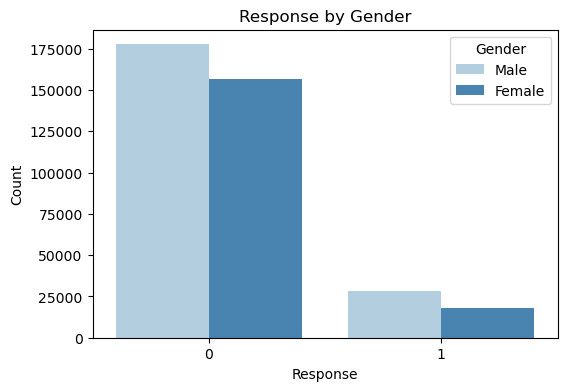

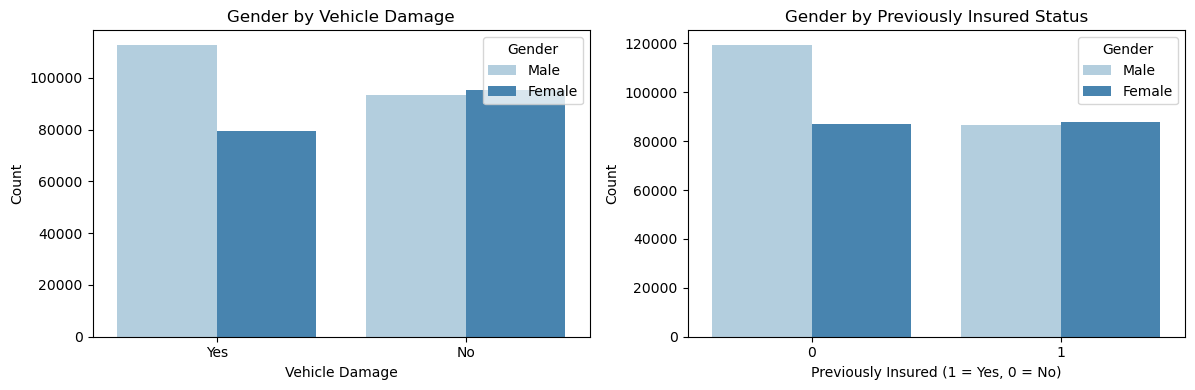

In [72]:
# Plot the distribution of the Gender variable
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Response', hue='Gender', palette='Blues')
plt.title('Response by Gender')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Response and other factors
plt.figure(figsize=(18, 4))

# Vehicle_Damage vs Response
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='Vehicle_Damage', hue='Gender', palette='Blues')
plt.title('Gender by Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')

# Previously_Insured vs Response
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='Previously_Insured', hue='Gender', palette='Blues')
plt.title('Gender by Previously Insured Status')
plt.xlabel('Previously Insured (1 = Yes, 0 = No)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Observations from the Plots:**

1. **Response by Gender**: 
   - Most individuals did not respond positively (Response = 0).
   - Males have a slightly higher count than females in both response categories.

2. **Gender by Vehicle Damage**: 
   - There are more males with vehicle damage (Yes) than females.
   - Females slightly outnumber males among those without vehicle damage (No).

3. **Gender by Previously Insured Status**: 
   - Males are more likely to be uninsured (Previously Insured = 0) than females.
   - Among those who are insured (Previously Insured = 1), the numbers of males and females are almost equal.


##### Distribution of Demographic and Vehicle Attributes by Gender

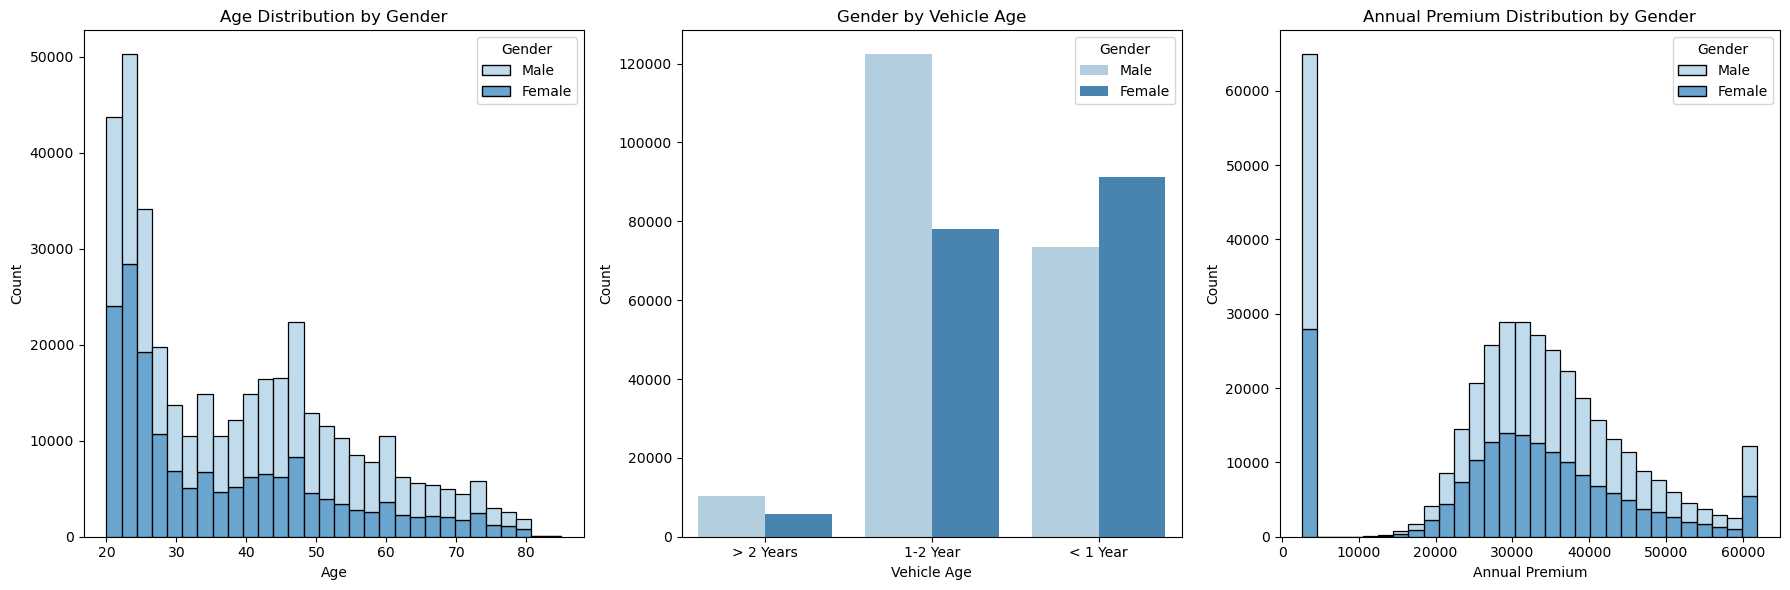

In [82]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data=data, x='Age', hue='Gender', multiple='stack', palette='Blues', bins=30, kde=False)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(data=data, x='Vehicle_Age', hue='Gender', palette='Blues')
plt.title('Gender by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.histplot(data=data, x='Annual_Premium', hue='Gender', multiple='stack', palette='Blues', bins=30, kde=False)
plt.title('Annual Premium Distribution by Gender')
plt.xlabel('Annual Premium')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Observations from the Plots:**

* **Age Distribution by Gender:**

    * The distribution of ages is similar for both genders, with a peak in the 25-40 age range.
    * There are slightly more female policyholders in the younger age groups (20-30) and slightly more male policyholders in the older age groups (50-70).

* **Gender by Vehicle Age:**

    * Both genders have a similar distribution of vehicle ages.
    * Most policyholders have vehicles that are 1-2 years old, followed by vehicles older than 2 years.
    * The proportion of vehicles less than 1 year old is relatively small for both genders.

* **Annual Premium Distribution by Gender:**

    * The distribution of annual premiums is similar for both genders, with a peak around the 25,000-30,000 range.
    * There is a long tail towards higher premiums, indicating a significant number of policyholders with higher premiums.
    * The distribution is slightly skewed to the right for both genders.

### 13. <u>Vehicle Age and Claims<u>

##### Examining the impact of vehicle age on the likelihood of a claim

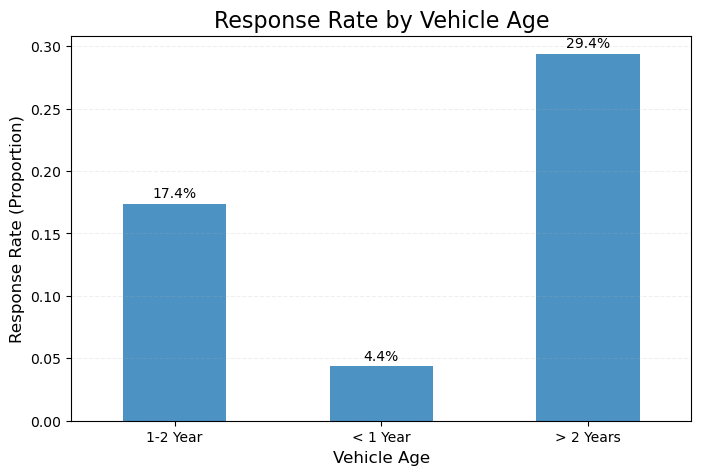

In [35]:
plt.figure(figsize=(8, 5))
bars = response_rate_by_vehicle_age.plot(kind='bar', alpha=0.8)
for bar in bars.containers:
    for rect in bar:
        height = rect.get_height()
        plt.text(
            rect.get_x() + rect.get_width() / 2,
            height + 0.005,
            f'{height:.1%}',
            ha='center',
            fontsize=10
        )

plt.title("Response Rate by Vehicle Age", fontsize=16)
plt.xlabel("Vehicle Age", fontsize=12)
plt.ylabel("Response Rate (Proportion)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

**Observations from the Plot:**

* **Vehicle Age and Response Rate:** There's a clear correlation between vehicle age and the response rate.
* **Higher Response for Older Vehicles:** Policyholders with vehicles older than 2 years have the highest response rate (29.4%).
* **Lower Response for Newer Vehicles:** Policyholders with newer vehicles (less than 1 year old) have the lowest response rate (4.4%).
* **Moderate Response for 1-2 Year Old Vehicles:** Those with vehicles aged 1-2 years have a moderate response rate (17.4%).

This suggests that older vehicles might have a higher likelihood of needing insurance claims or replacements, leading to a higher interest in insurance policies.

### 14. <u>Region-wise Analysis<u>

##### Analyzing regional patterns in insurance claims

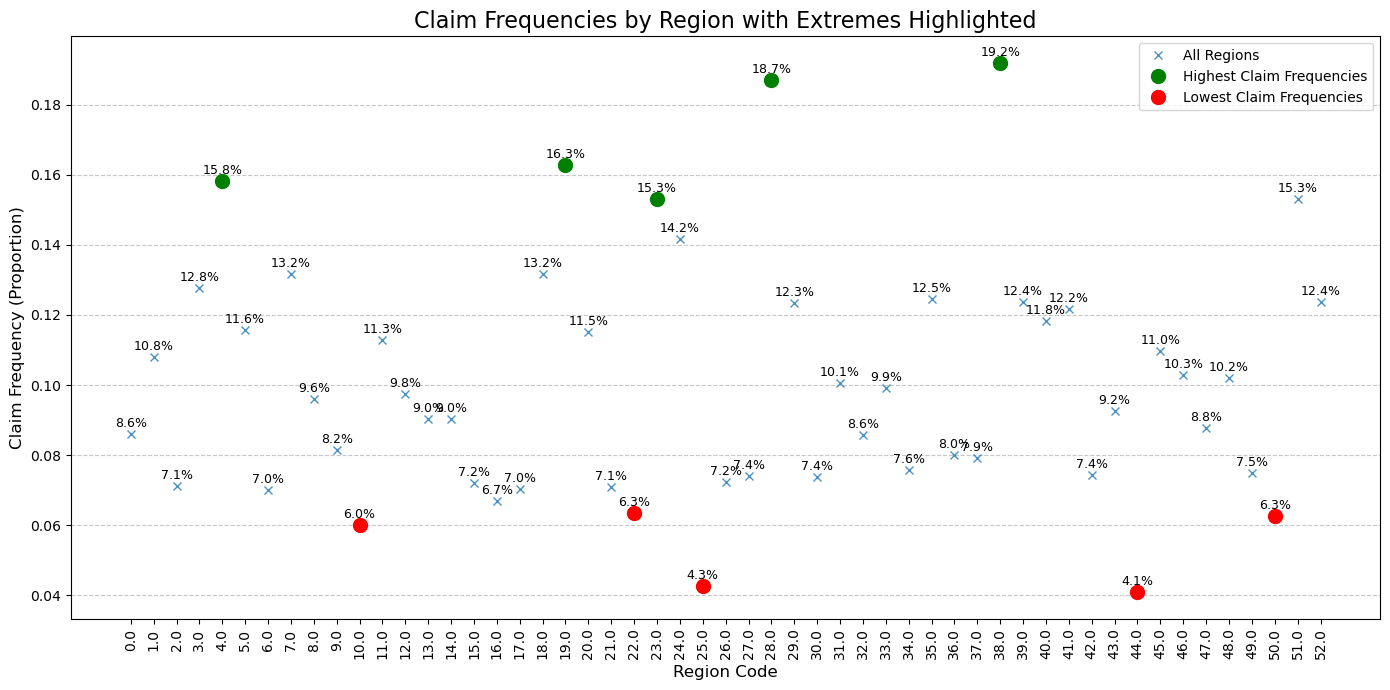

In [68]:
regional_claim_frequencies = df.groupby('Region_Code')['Response'].mean()

plt.figure(figsize=(14, 7))

plt.plot(regional_claim_frequencies.index.astype(str), regional_claim_frequencies, 'x', label='All Regions', alpha=0.8)


plt.plot(highest_regions.index.astype(str), highest_regions, 'o', color='green', label='Highest Claim Frequencies', markersize=10)
plt.plot(lowest_regions.index.astype(str), lowest_regions, 'o', color='red', label='Lowest Claim Frequencies', markersize=10)

for idx in regional_claim_frequencies.index:
    plt.text(
        str(idx), regional_claim_frequencies[idx] + 0.002,
        f'{regional_claim_frequencies[idx]:.1%}',
        ha='center', fontsize=9
    )

plt.title("Claim Frequencies by Region with Extremes Highlighted", fontsize=16)
plt.xlabel("Region Code", fontsize=12)
plt.ylabel("Claim Frequency (Proportion)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Top 5 Regions with Highest Claim Frequencies:**

* Region Code 38: 19.2%
* Region Code 28: 18.7%
* Region Code 19: 16.3%
* Region Code 4: 15.8%
* Region Code 23: 15.3%

**Top 5 Regions with Lowest Claim Frequencies:**

* Region Code 44: 4.1%
* Region Code 25: 4.3%
* Region Code 10: 6.0%
* Region Code 50: 6.3%
* Region Code 22: 6.3%

**Observations from the Plot:**

* **Regional Variation in Claim Frequencies:** There is significant variation in claim frequencies across different regions.
* **High Claim Regions:** A few regions (highlighted in green) exhibit significantly higher claim frequencies compared to the average.
* **Low Claim Regions:** Similarly, a few regions (highlighted in red) have substantially lower claim frequencies.
* **Majority of Regions:** Most regions have claim frequencies clustered around a certain range, indicating a general trend.

### 15. <u>Claim Frequency by Vehicle Damage Analysis<u>

##### Investigating the relationship between vehicle damage and claim frequencies

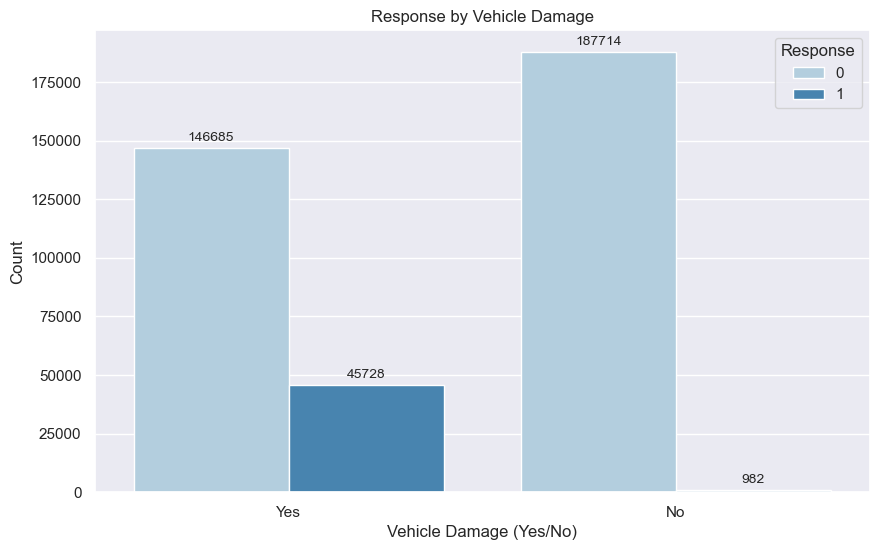

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Vehicle_Damage', hue='Response', palette='Blues')
plt.title('Response by Vehicle Damage')
plt.xlabel('Vehicle Damage (Yes/No)')
plt.ylabel('Count')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.show()

**Observations from the Plot:**

* **Impact of Vehicle Damage on Response:** There is a clear relationship between vehicle damage history and the response rate.
* **Higher Response with Vehicle Damage:** Policyholders with a history of vehicle damage (Yes) are significantly more likely to respond positively (Response = 1). 
* **Lower Response without Vehicle Damage:** Those without a history of vehicle damage (No) have a lower response rate.

This suggests that individuals with previous vehicle damage claims might be more proactive in seeking insurance coverage, possibly due to concerns about future incidents.

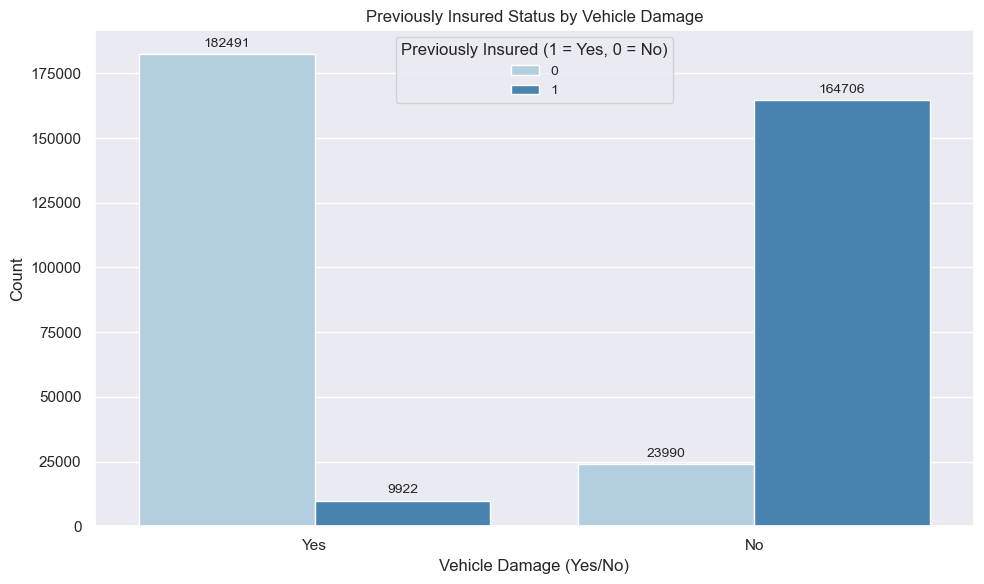

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Vehicle_Damage', hue='Previously_Insured', palette='Blues')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.title('Previously Insured Status by Vehicle Damage', fontsize=12)
plt.xlabel('Vehicle Damage (Yes/No)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Previously Insured (1 = Yes, 0 = No)', fontsize=10)
plt.tight_layout()

plt.show()


**Observations from the Plot:**

* **Relationship between Previous Insurance and Vehicle Damage:** There is a clear interaction between whether a policyholder was previously insured and their vehicle damage history.
* **Higher Previous Insurance for No Damage:** Policyholders without a history of vehicle damage (No) are more likely to have been previously insured (1). 
* **Lower Previous Insurance for Vehicle Damage:** Those with a history of vehicle damage (Yes) are less likely to have been previously insured (0). 

This suggests that a history of vehicle damage might negatively impact the likelihood of obtaining insurance coverage in the future.

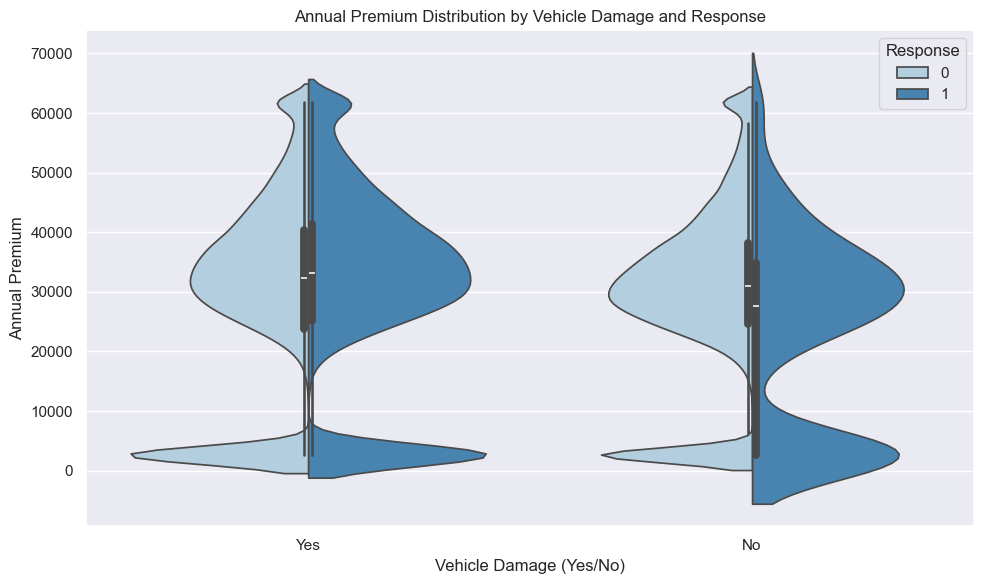

In [49]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Vehicle_Damage', y='Annual_Premium', hue='Response', palette='Blues', split=True)

# Customize the plot
plt.title('Annual Premium Distribution by Vehicle Damage and Response')
plt.xlabel('Vehicle Damage (Yes/No)')
plt.ylabel('Annual Premium')
plt.legend(title='Response', loc='upper right')
plt.tight_layout()

plt.show()

**Observations from the Plot:**

* **Annual Premium Distribution by Vehicle Damage and Response:** The plot shows how annual premiums vary based on vehicle damage history and the policyholder's response.
* **Higher Premiums for Damaged Vehicles:** In general, policyholders with vehicles that have been damaged tend to have higher annual premiums compared to those without damage.
* **Premium Distribution Differences by Response:** The distribution of premiums differs between policyholders who responded positively (Response = 1) and those who didn't (Response = 0).
    * **Positive Response:** Policyholders who responded positively tend to have a wider range of annual premiums, with some having very high premiums.
    * **Negative Response:** Those who didn't respond tend to have a more concentrated distribution of premiums, with a majority falling in the lower to mid-range.

This suggests that factors like vehicle damage history and the policyholder's interest in the policy can significantly influence the annual premium charged.

### 16. <u>Customer Loyalty Analysis<u>

##### Analyzing if the number of policies held by a customer influences claim likelihood.

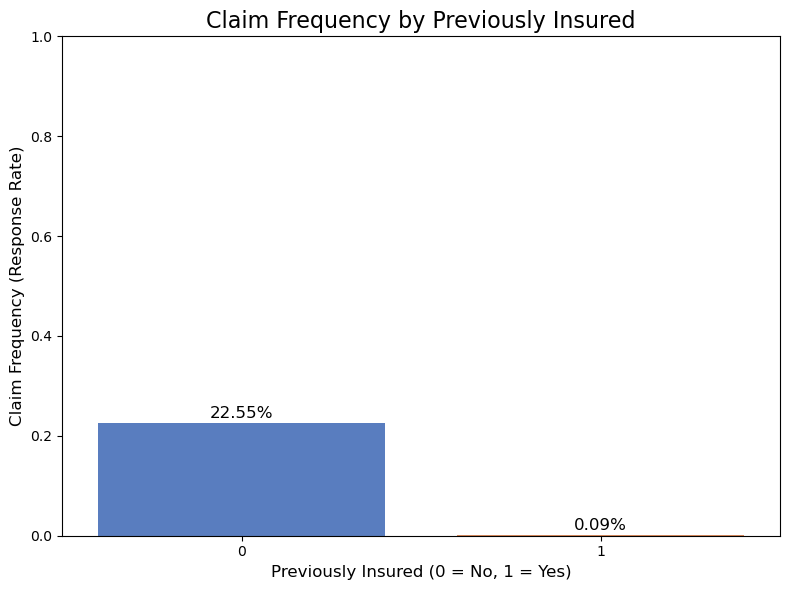

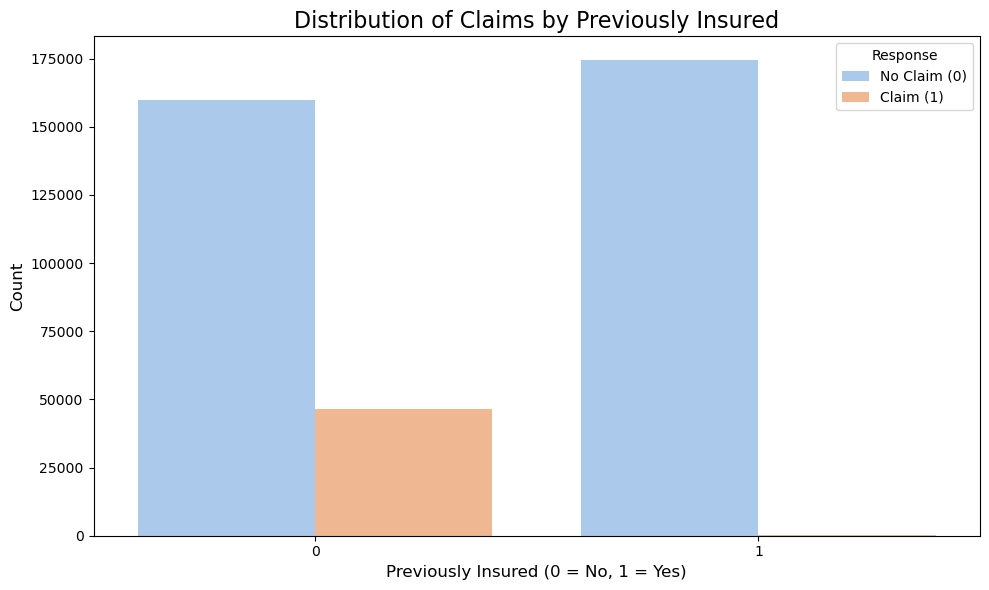

In [28]:
insured_response_rate = df.groupby('Previously_Insured')['Response'].mean().reset_index()

# Bar Plot for Claim Frequency
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Previously_Insured', y='Response',hue='Previously_Insured', data=insured_response_rate, palette="muted", legend=False)

for index, row in insured_response_rate.iterrows():
    bar_plot.text(x=index, y=row['Response'] + 0.01, 
                  s=f"{row['Response']:.2%}", 
                  ha='center', fontsize=12, color='black')

plt.title("Claim Frequency by Previously Insured", fontsize=12)
plt.xlabel("Previously Insured (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Claim Frequency (Response Rate)", fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Count Plot for Claims by Previously Insured
plt.figure(figsize=(10, 6))
sns.countplot(x='Previously_Insured', hue='Response', data=data, palette="Blues")
plt.title("Distribution of Claims by Previously Insured", fontsize=12)
plt.xlabel("Previously Insured (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Response", loc="upper right", labels=["No Claim (0)", "Claim (1)"])
plt.tight_layout()
plt.show()

**Observations from the Plot:**

**Claim Frequency by Previously Insured:**

* **Low Claim Frequency for Previously Insured:** Policyholders who were previously insured have a significantly lower claim frequency (0.09%).
* **Higher Claim Frequency for Non-Previously Insured:** Those who were not previously insured have a much higher claim frequency (22.55%).

**Distribution of Claims by Previously Insured:**

* **Fewer Claims for Previously Insured:** The number of claims is significantly lower for previously insured policyholders.
* **More Claims for Non-Previously Insured:** A larger number of claims are associated with policyholders who were not previously insured.

**Overall Interpretation:**

These plots suggest that having a history of insurance can positively impact a policyholder's claim behavior. Previously insured individuals are less likely to file claims, potentially indicating responsible driving habits or a lower risk profile.

### 17. <u>Time Analysis<u>

##### Exploring temporal patterns in insurance claims

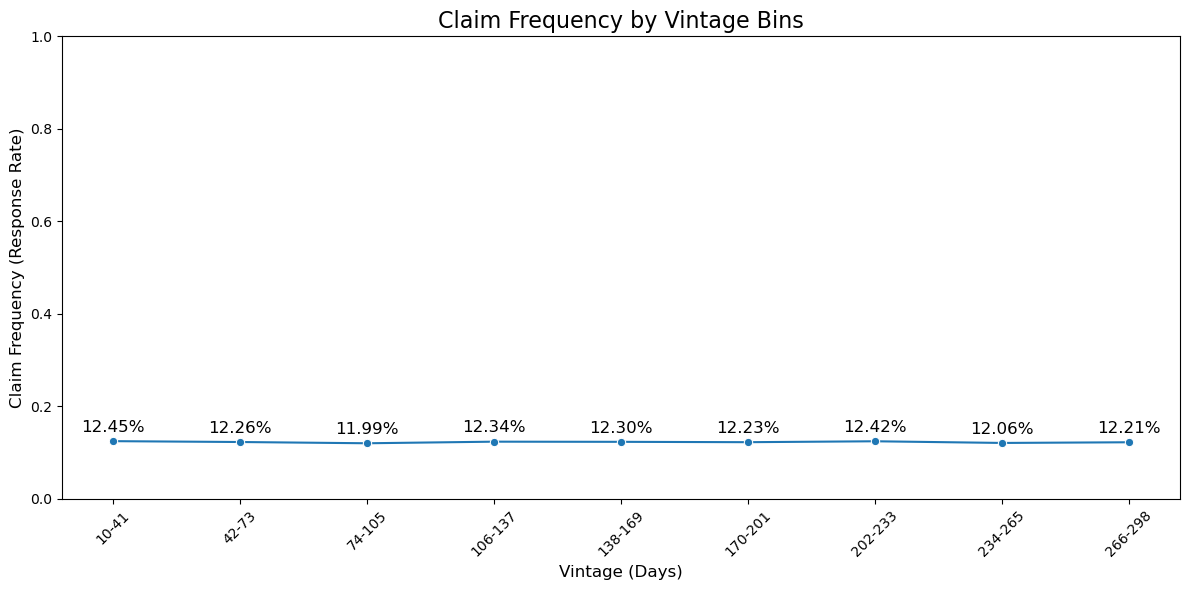

In [90]:
bins = np.linspace(10, 299, num=10)  # Adjust the number of bins as needed
labels = [f"{int(bins[i])}-{int(bins[i+1]-1)}" for i in range(len(bins)-1)]
data['Vintage_Binned'] = pd.cut(data['Vintage'], bins=bins, labels=labels, right=False)

# Calculate claim frequency by Vintage bins
vintage_claim_rate = data.groupby('Vintage_Binned', observed=False)['Response'].mean().reset_index()

# Line plot with annotations
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x='Vintage_Binned', y='Response', data=vintage_claim_rate, marker='o')

# Add annotations to the points
for index, row in vintage_claim_rate.iterrows():
    plt.text(index, row['Response'] + 0.02, f"{row['Response']:.2%}", 
             ha='center', fontsize=12, color='black')

# Plot settings
plt.title("Claim Frequency by Vintage Bins", fontsize=16)
plt.xlabel("Vintage (Days)", fontsize=12)
plt.ylabel("Claim Frequency (Response Rate)", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis to percentage scale
plt.tight_layout()
plt.show()


**Observations from the Plot:**

* **Claim Frequency by Vintage:** The plot shows how the claim frequency (response rate) varies across different vintage bins (days since the policy was taken).
* **Relatively Stable Claim Frequency:** The claim frequency remains relatively stable across all vintage bins, with minor fluctuations.
* **No Significant Trend:** There is no clear upward or downward trend in claim frequency as the vintage increases.

This suggests that the time since a policy was taken does not have a significant impact on the likelihood of a claim. Policyholders with both new and older policies exhibit similar claim patterns.

### <u>Vehicle Insurance EDA: Key Insights<u>

#### 1. Demographic Patterns
- Majority of policyholders are **male** and aged **20-40**.
- Older vehicles (**>2 years**) and middle-aged individuals (**41-60**) show higher interest in insurance policies.

#### 2. Insurance Behavior
- Previously **uninsured individuals** are more likely to respond positively to new insurance offers.
- Vehicles with prior **damage history** are associated with higher insurance interest.

#### 3. Policy and Premium Insights
- Annual premiums are concentrated around **₹20,000–40,000**, with claim frequencies peaking for higher premiums (**₹60,000–80,000**).
- No significant trend is observed between **policy vintage** and claim frequency.

#### 4. Regional and Product Strategy
- **Regional variation** in claim frequencies highlights the need for targeted marketing.
- Focus on offering diverse premiums and products for different customer segments, especially for **females** and owners of **older vehicles**.

### <u>Conclusion<u>
The analysis underscores the importance of:
- Data-driven marketing strategies.
- Personalized product offerings.
- Targeted customer engagement.

These steps are essential to maximize policyholder retention and acquisition.